<a href="https://colab.research.google.com/github/MohammadAli147369/Machine-learning-projects/blob/main/Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
df = pd.read_csv('/content/credit_card_churn - credit_card_churn.csv.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns
categorical_col

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
numerical_column = df.select_dtypes(include=['int64','float64']).columns
numerical_column

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
type(numerical_column)

pandas.core.indexes.base.Index

In [ ]:
numerical_column = list(numerical_column)
categorical_col = list(categorical_col)

In [ ]:
numerical_column

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
numerical_column

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
categorical_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
numerical_column.remove('CLIENTNUM')
numerical_column

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
categorical_col.remove('Attrition_Flag')

In [ ]:
categorical_col


['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
# Value counts, bar graph
def univariate(data, column_name):
  value_counts = data[column_name].value_counts()
  # Plot the bar graph
  plt.figure(figsize=(10, 6))  # Adjust figure size if needed
  value_counts.plot(kind='bar')
  plt.title('Bar Graph of {}'.format(column_name))
  plt.xlabel('Categories')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)  # Rotate x-axis labels if needed
  plt.grid(axis='y')  # Add grid lines for better readability
  plt.show()


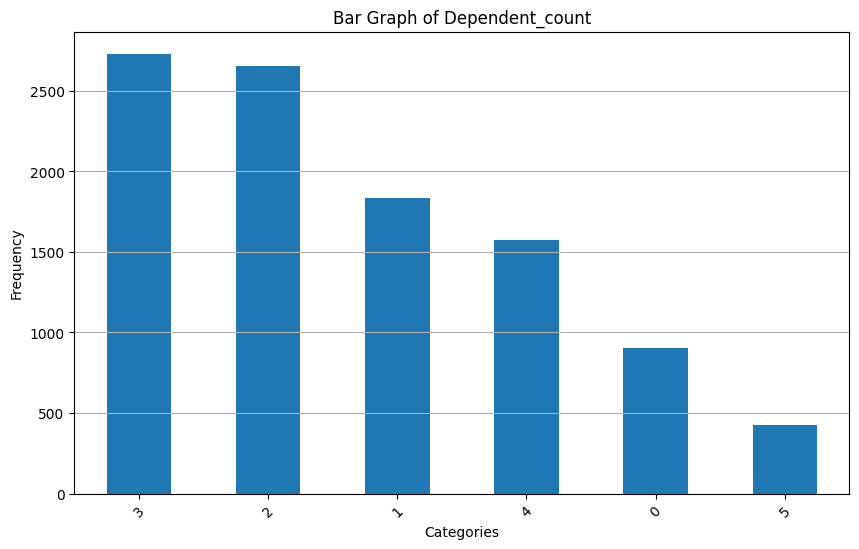

In [ ]:
univariate(df, 'Dependent_count')

In [ ]:
def distribution_plot(df, feature, figsize=(10,6), bins=10, kde=False):
    f, ax = plt.subplots(nrows=1, figsize=figsize)  # Corrected subplot creation
    sns.histplot(data=df, x=feature, kde=kde, ax=ax, bins=bins)
    ax.axvline(df[feature].mean(), color='green', linestyle="--")  # Corrected axvline for mean
    ax.axvline(df[feature].median(), color='red', linestyle="--")  # Corrected axvline for median
    ax.axvline(df[feature].mode().values[0], color='yellow', linestyle="--")  # Corrected axvline for mode


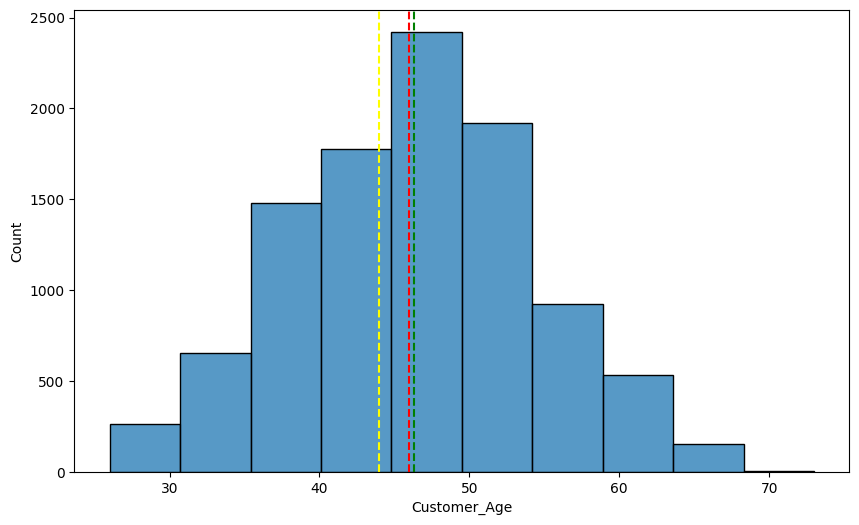

In [ ]:
distribution_plot(df, 'Customer_Age')

In [ ]:
value_count = df['Attrition_Flag'].value_counts(normalize=True)
value_count

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

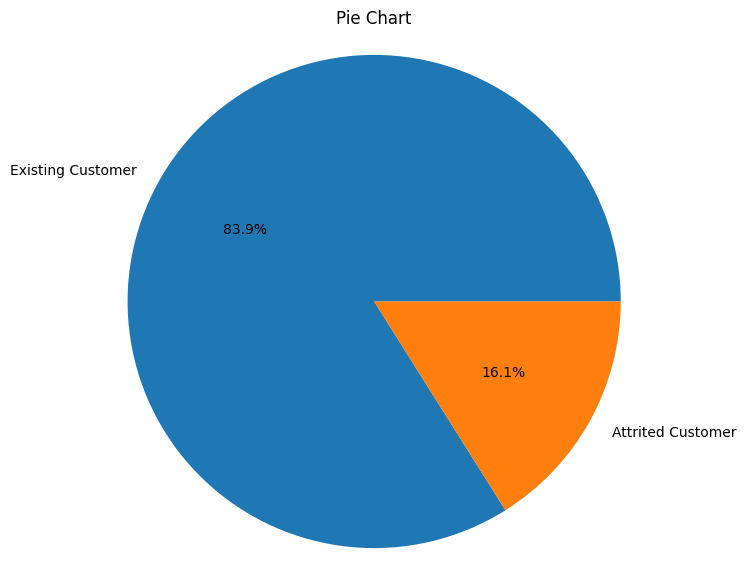

In [ ]:
plt.figure(figsize=(7,7))
labels = value_count.index.tolist()
sizes = value_count.values.tolist()
plt.pie( value_count.values.tolist() , labels= value_count.index.tolist(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart')
plt.show()

<Figure size 600x600 with 0 Axes>

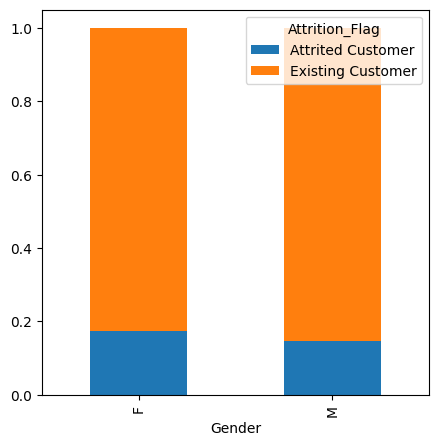

In [ ]:
# Attrition flag and gender

plt.figure(figsize=(6, 6))
abc = pd.crosstab(df['Gender'], df['Attrition_Flag'], normalize='index')  # Normalize along the index (rows)
abc.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.show()

In [ ]:
df.drop(columns=['CLIENTNUM','Avg_Open_To_Buy', 'Months_on_book', 'Marital_Status' ], inplace=True)
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
education_levels  = {'High School':'lower education',
        'Graduate':'lower education',
        'Uneducated':'lower education',
         'Unknown': 'lower education',
        'College': 'lower education',
       'Post-Graduate': 'higher education',
        'Doctorate': 'higher education'}

df['Education_Level'].replace(education_levels)

0        lower education
1        lower education
2        lower education
3        lower education
4        lower education
              ...       
10122    lower education
10123    lower education
10124    lower education
10125    lower education
10126    lower education
Name: Education_Level, Length: 10127, dtype: object

In [ ]:
# df['Education_level] = df['Education_level].apply(lambda x: 'higher education'if x in ('Post-Graduate' ,'Doctorate') else 'lower education')

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 0 if x in 'Existing Customer' else 1)

In [ ]:
df['Attrition_Flag'].unique()

array([0, 1])

In [ ]:
categorical_col

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
categorical_col

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
categorical_col.remove('Marital_Status')

In [ ]:
categorical_col

['Gender', 'Education_Level', 'Income_Category', 'Card_Category']

In [ ]:
df = pd.get_dummies(data=df,columns=categorical_col, drop_first = True)

In [ ]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,5,1,3,12691.0,777,1.335,1144,...,False,False,False,True,False,False,False,False,False,False
1,0,49,5,6,1,2,8256.0,864,1.541,1291,...,False,False,False,False,False,True,False,False,False,False
2,0,51,3,4,1,0,3418.0,0,2.594,1887,...,False,False,False,False,True,False,False,False,False,False
3,0,40,4,3,4,1,3313.0,2517,1.405,1171,...,False,False,False,False,False,True,False,False,False,False
4,0,40,3,5,1,0,4716.0,0,2.175,816,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,3,2,3,4003.0,1851,0.703,15476,...,False,False,True,False,False,False,False,False,False,False
10123,1,41,2,4,2,3,4277.0,2186,0.804,8764,...,False,True,True,False,False,False,False,False,False,False
10124,1,44,1,5,3,4,5409.0,0,0.819,10291,...,False,False,False,False,False,True,False,False,False,False
10125,1,30,2,4,3,3,5281.0,0,0.535,8395,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 27)
(2026, 27)
(8101,)
(2026,)


In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
model.score(x_test, y_test)

0.9615004935834156

In [ ]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.94      0.82      0.87       331

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
model_gb = GradientBoostingClassifier()

In [ ]:
model_gb.fit(x_train, y_train)


GradientBoostingClassifier()

In [ ]:
model_gb.score(x_train, y_train)

0.9750648068139736

In [ ]:
print(classification_report(y_train, model_gb.predict(x_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6805
           1       0.96      0.89      0.92      1296

    accuracy                           0.98      8101
   macro avg       0.97      0.94      0.95      8101
weighted avg       0.97      0.98      0.97      8101



In [ ]:
print(classification_report(y_test, model_gb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.93      0.84      0.88       331

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [ ]:
r = RandomForestClassifier(random_state=1)
p = {'max_depth': [4,5,7,8, None],
     'max_features': ['sqrt', 'log2', None],
     'n_estimators': [80, 90, 100, 110, 120]}

core = metrics.make_scorer(metrics.recall_score)
random_object = RandomizedSearchCV(r, p, scoring=core, cv=3, n_iter=50, verbose=2)
random_object = random_object.fit(x_train, y_train)
r = random_object.best_estimator_
r.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .max_depth=None, max_features=log2, n_estimators=80; total time=   0.7s
[CV] END .max_depth=None, max_features=log2, n_estimators=80; total time=   0.7s
[CV] END .max_depth=None, max_features=log2, n_estimators=80; total time=   0.7s
[CV] END max_depth=None, max_features=None, n_estimators=110; total time=   3.4s
[CV] END max_depth=None, max_features=None, n_estimators=110; total time=   3.3s
[CV] END max_depth=None, max_features=None, n_estimators=110; total time=   4.2s
[CV] END ....max_depth=4, max_features=log2, n_estimators=80; total time=   0.4s
[CV] END ....max_depth=4, max_features=log2, n_estimators=80; total time=   0.4s
[CV] END ....max_depth=4, max_features=log2, n_estimators=80; total time=   0.4s
[CV] END ...max_depth=7, max_features=log2, n_estimators=120; total time=   0.8s
[CV] END ...max_depth=7, max_features=log2, n_estimators=120; total time=   0.8s
[CV] END ...max_depth=7, max_features=log2, n_e

RandomForestClassifier(max_features=None, n_estimators=90, random_state=1)

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)


In [ ]:
model_gb_over = GradientBoostingClassifier()
model_gb_over.fit(x_train_over, y_train_over)

GradientBoostingClassifier()

In [ ]:
model_gb_over.score(x_train_over, y_train_over)

0.9750918442321822

In [ ]:
x_train_over.shape

(13610, 27)

In [ ]:
y_train_over.shape

(13610,)

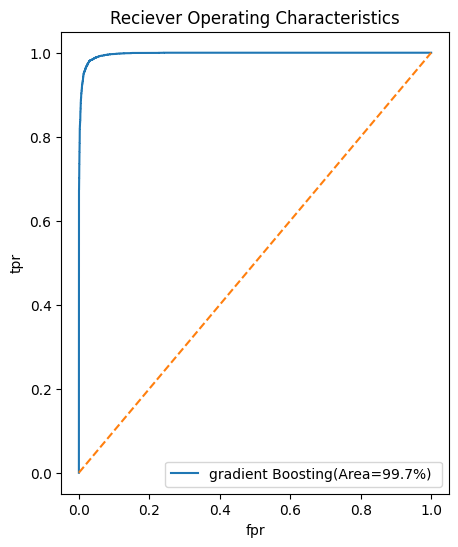

In [ ]:
roc_auc = roc_auc_score(y_train_over, model_gb_over.predict_proba(x_train_over)[:,1])
fpr, tpr, threshold = roc_curve(y_train_over, model_gb_over.predict_proba(x_train_over)[:,1])
plt.figure(figsize=(5,6))
plt.plot(fpr, tpr, label=f"gradient Boosting(Area={round(roc_auc, 3)*100}%) ")
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], "--")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Reciever Operating Characteristics")
plt.show()

In [ ]:
x_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13610 entries, 0 to 13609
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    13610 non-null  int64  
 1   Dependent_count                 13610 non-null  int64  
 2   Total_Relationship_Count        13610 non-null  int64  
 3   Months_Inactive_12_mon          13610 non-null  int64  
 4   Contacts_Count_12_mon           13610 non-null  int64  
 5   Credit_Limit                    13610 non-null  float64
 6   Total_Revolving_Bal             13610 non-null  int64  
 7   Total_Amt_Chng_Q4_Q1            13610 non-null  float64
 8   Total_Trans_Amt                 13610 non-null  int64  
 9   Total_Trans_Ct                  13610 non-null  int64  
 10  Total_Ct_Chng_Q4_Q1             13610 non-null  float64
 11  Avg_Utilization_Ratio           13610 non-null  float64
 12  Gender_M                        

In [ ]:
x_train_over.isnull().sum()

Customer_Age                      0
Dependent_count                   0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Education_Level_Unknown           0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Income_Category_Unknown           0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver              0
dtype: int64

In [ ]:
y_train_over.isnull().sum()

0

In [ ]:
print(model_gb_over.predict_proba(x_train_over)[:,1])

[0.01205228 0.12331952 0.14800687 ... 0.99246013 0.98471546 0.77138766]


In [ ]:
precision_score(y_train_over, model_gb_over.predict(x_train_over))

0.9705967976710335

In [ ]:
recall_score(y_train_over, model_gb_over.predict(x_train_over))

0.9798677443056576

In [ ]:
f1_score(y_train_over, model_gb_over.predict(x_train_over))

0.9752102376599634